University of Zagreb, Faculty of Electrical Engineering and Computing

# Introduction to Data Science Course Project
## Malignant and Benign Breast Cancer Classification using Machine Learning Algorithms

#### Fani Sentinella-Jerbić, Matej Čubek, Leon Novački, Fran Hrabar, 2021

---

This project's aim is to replicate and creatively expand a data science themed scientific article using a Jupyter notebook. We replicated the following article:

S. Ara, A. Das and A. Dey, _Malignant and Benign Breast Cancer Classification using Machine Learning Algorithms_, 2021 International Conference on Artificial Intelligence (ICAI), 2021, pp. 97-101, doi: 10.1109/ICAI52203.2021.9445249.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import collections

plt.style.use('seaborn')

### About the article


#### Research type classification:
- according to purpose: **applied** - uses known methods on new problems, doesn't answer any general questions in the field of artificial science nor does it introduce any new methods
- according to information origin: **secondary** - uses dataset provided by another institution
- according to time: **cross-sectional study** - made from an existing dataset during the International Conference on Artificial Intelligence in Islamabad
- according to method of gathering: **documentary** - uses existing data for the analysis, doesn't collect any new data
- according to data type: **quantitative** - all features have numerical values which are then used to compute the predictions
- according to degree of manipulation: **observational** - the data was collected from real patients already having the breast cancer
- according to depth of conclusion: **correlational** - tries to determine a model which predicts if a person has benign or malignant breast cancer based on the collected features
- according to type of conclusion: **deductive** - some things can be predicted by ML algorithms and that is what the authors of this article tried to do for breast cancer classification


#### Method of information retrieval:

Authors used an existing dataset provided by the University of Wisconsin Hospitals and donated by Nick Street in November 1995.


#### Research ethics:

The article was made and published as a part of the International Conference on Artificial Intelligence in Islamabad which is under sponsorship of IEEE. This leads me to believe it is published legally and with a certain level of academic dignity. The research did not include dealing with patients since they used a pre-existing dataset so I believe they caused minimum risk of harm to society. 

However, the article contains some logical issues in interpreting graphical data (described further in this notebook) so one could argue that the academic dignity of the article is questionable. This is not unusual for an article written at a conference since the time spent on the article is limited. Also, the article could have given more academic credit to the authors of the dataset which wanted certain information to be provided when the dataset is used in research (can be seen at the end of this notebook). 

### Descriptive analysis
The dataset used is a special dataset called "Wisconsin Diagnostic Breast Cancer (WDBC)". It consists of 357 benign and 212 malignant cancer samples, as seen in the barchart below. 

In [2]:
from sklearn import datasets

data = datasets.load_breast_cancer()

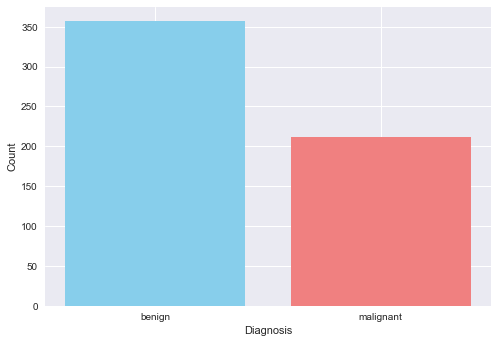

In [3]:
cnt = np.bincount(data.target)
plt.bar(data.target_names[::-1], cnt[::-1], color=['skyblue', 'lightcoral'])
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

It contains calculated measures such as **mean**, **standard error** and **the worst (largest) value** of 30 different parameters determined by microscopic analysis on the breast tissue. The tissue is collected from a patient through *Fine Needle Aspiration* biopsy procedure. 

In [4]:
# original samples
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Below we can see the counterplot of the mean radius. 

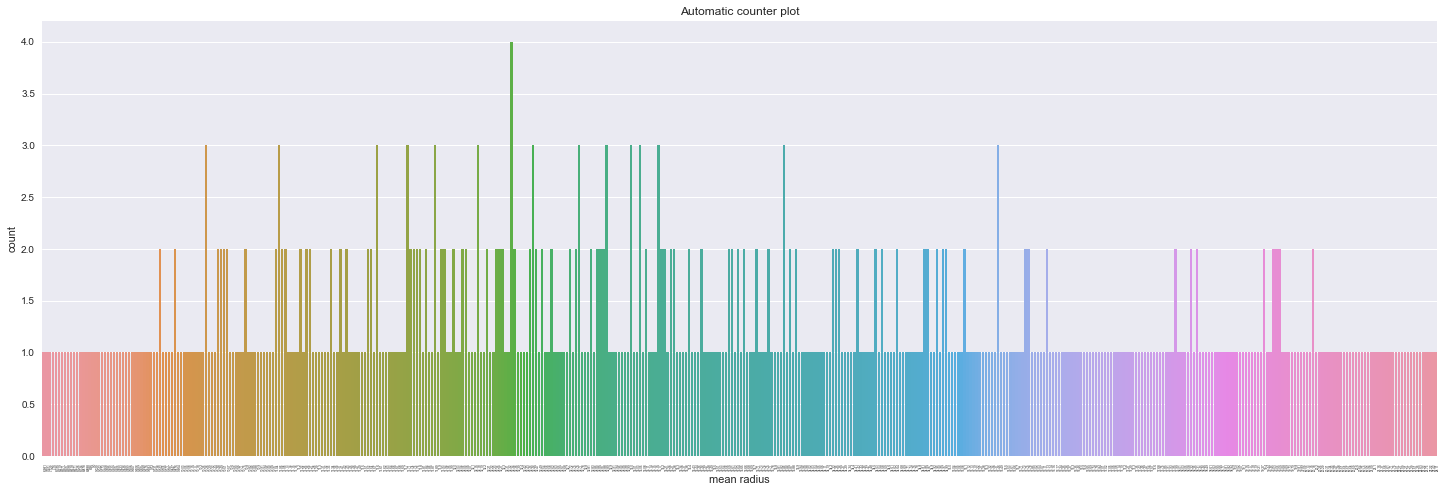

In [5]:
plt.figure(figsize=(25, 8))
ax = sns.countplot(x=X['mean radius'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="left", fontsize=3)
plt.title('Automatic counter plot')
plt.show()

As the x-axis values are not recognizable, we have plotted another counterplot:

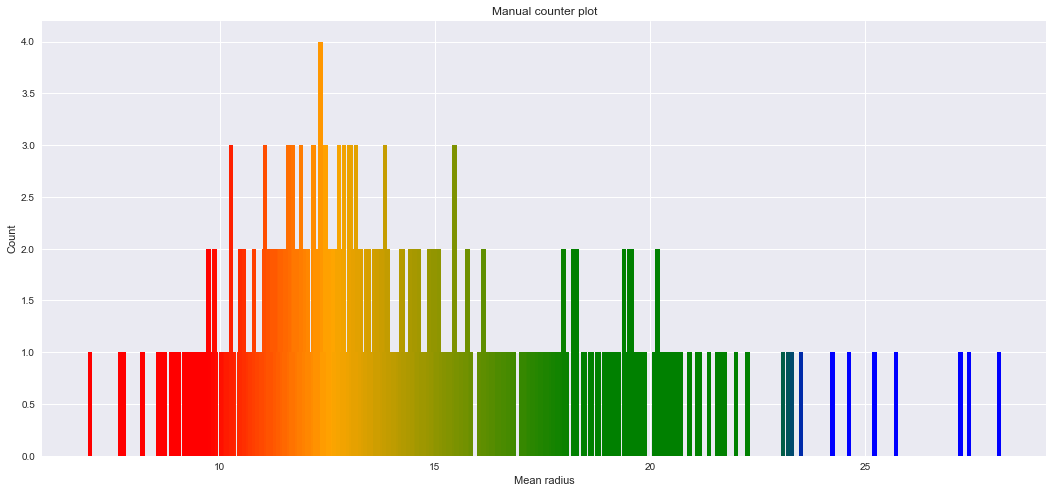

In [6]:
import matplotlib.colors as mcolors

w = collections.Counter(X['mean radius'])

clist = [(0, "red"), (0.125, "red"), (0.25, "orange"), (0.5, "green"),
         (0.7, "green"), (0.75, "blue"), (1, "blue")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)
plt.figure(figsize=(18, 8))
xp = np.array(list(w.keys())).astype(float)
yp = np.array(list(w.values())).astype(float)
plt.bar(xp, yp, color=rvb(20 * xp / len(xp) - 0.3), width=0.1)
plt.title('Manual counter plot')
plt.xlabel('Mean radius')
plt.ylabel('Count')
plt.show()

The authors of the scientific paper have determined the following from the counter graph: *it can be observed that suspected patients not bearing cancer have a mean radius of around 1, whereas suspected patients bearing cancer have a 
mean radius of more than 1*, however I believe  the authors have made a mistake. The graph doesn't show the radius being around 1 for any of the patients. In fact, the smallest radius mean in the dataset is 6.981 and the mean of all radius means is 14.127292 (calculated in the previous section), which is far from 1. 

The proof of this can also be seen in the histogram below.

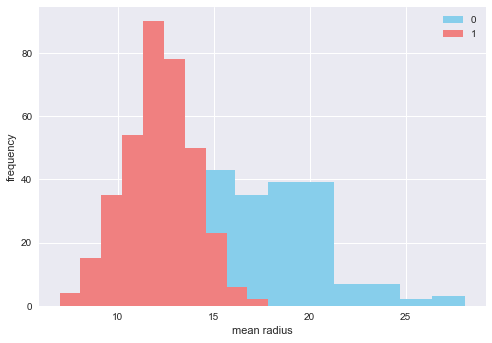

In [7]:
D = pd.DataFrame(X.copy())
D.insert(0, 'diagnosis', data.target)

D['mean radius'][D['diagnosis'] == 0].hist(color='skyblue', label='0')
D['mean radius'][D['diagnosis'] == 1].hist(color='lightcoral', label='1')
plt.xlabel('mean radius')
plt.ylabel('frequency')
plt.legend()
plt.show()

### Train-test split

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

D_train = pd.DataFrame(X_train.copy())
D_train.insert(0, 'diagnosis', y_train)

### Feature selection

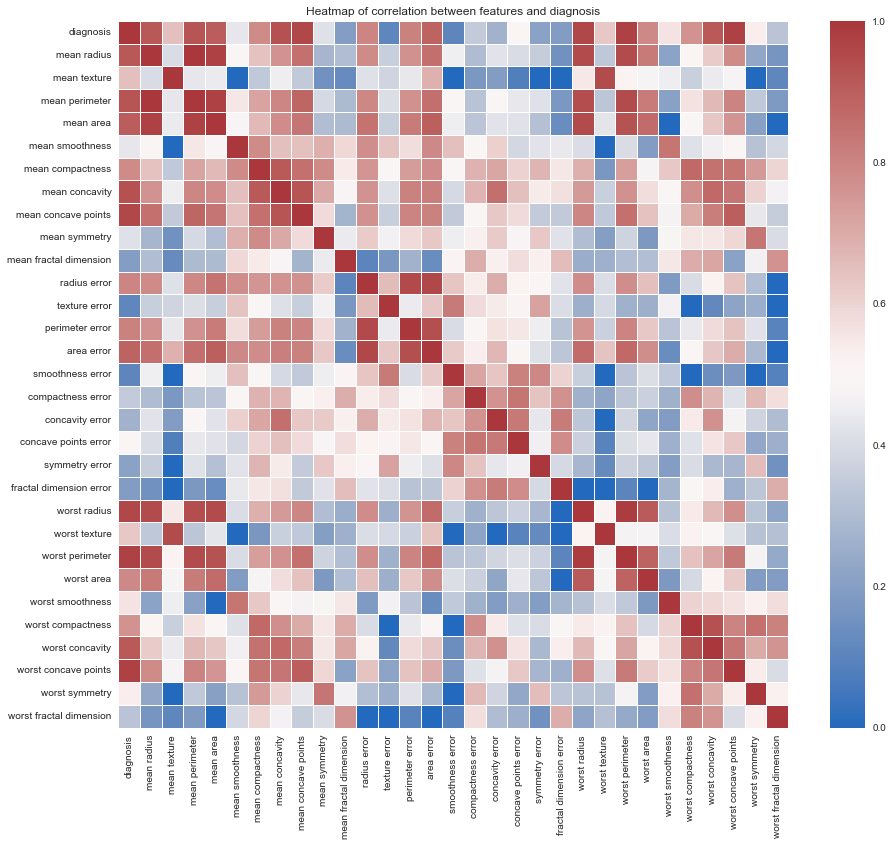

In [9]:
import phik

D_train = pd.DataFrame(X_train.copy())
D_train.insert(0, 'diagnosis', y_train)

#cor_matrix = D_train.corr()
cor_matrix_with_target = D_train.phik_matrix(interval_cols=D_train.columns)
cor_matrix_without_target = X_train.phik_matrix(interval_cols=D_train.columns)

plt.figure(figsize=(15, 13))
sns.heatmap(cor_matrix_with_target, cmap="vlag", linewidths=.5)  #, mask=np.triu(D_train_mean.corr()))
plt.title("Heatmap of correlation between features and diagnosis")
plt.show()

There are many attributes that are higly correlated between each other, so we need to remove them first.
We will do so using the correlation matrix and searching for pairs with an absolute correlation of grater then 0.9.
Those fields are printed in the bottom and removed from the dataset.

In [10]:
upper_tri = cor_matrix_without_target.abs().where(
    np.triu(np.ones(cor_matrix_without_target.shape), k=1).astype(np.bool_))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

print(list(to_drop))

['mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst concavity']


In [11]:
X_train = X_train.drop(list(to_drop), axis=1)
X_test = X_test.drop(list(to_drop), axis=1)
D_train = D_train.drop(list(to_drop), axis=1)

X_train.shape

(426, 19)

<Figure size 720x360 with 0 Axes>

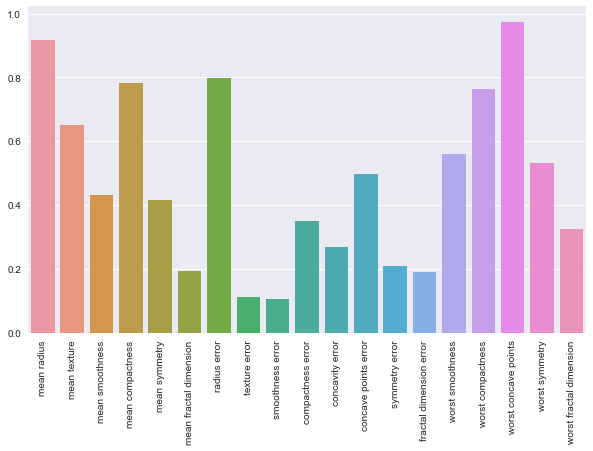

In [12]:
plt.figure(figsize=(10, 5))

corr_with_target = D_train.phik_matrix(interval_cols=D_train.columns)['diagnosis'].drop(labels=['diagnosis'])

plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_target.index, y=corr_with_target.values)
plt.xticks(rotation=90)
plt.show()

Now that we will use a Feature selection method so that we find the optimum subset of available features for our machine learning algorithms later.

In [13]:
from sklearn.feature_selection import SelectKBest, chi2

X_best = SelectKBest(chi2, k=7).fit(X_train, y_train)

mask = X_best.get_support()
best_features = []
for curr_bool, feature in zip(mask, X_train.columns):
    if curr_bool:
        best_features.append(feature)

print(f"Best features are: {best_features}")

Best features are: ['mean radius', 'mean texture', 'mean compactness', 'radius error', 'concavity error', 'worst compactness', 'worst concave points']


In [14]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

X_best = SequentialFeatureSelector(estimator=LogisticRegression(max_iter=500), n_features_to_select=7, cv=10,
                                   direction='forward', n_jobs=4).fit(X_train, y_train)
mask = X_best.get_support()
best_features = []
for curr_bool, feature in zip(mask, X_train.columns):
    if curr_bool:
        best_features.append(feature)

print(f"Best features are: {best_features}")

Best features are: ['mean radius', 'mean texture', 'mean fractal dimension', 'radius error', 'smoothness error', 'compactness error', 'worst compactness']


In [15]:
X_train = X_train[X_train.columns[X_best.get_support(indices=True)]]
X_test = X_test[X_test.columns[X_best.get_support(indices=True)]]

X_train.shape

(426, 7)

--- 

### Training and testing

Some algorithms perform better when the data is scaled so that is what I did here. Article authors mention using scaling as well.

In [16]:
from sklearn.preprocessing import StandardScaler

sclr = StandardScaler()
X_train_s = sclr.fit_transform(X_train)
X_test_s = sclr.fit_transform(X_test)

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV

results = pd.DataFrame(
    columns=['Algorithms', 'Training Accuracy', 'Testing Accuracy', 'Testing Recall', 'Testing F1 Score',
             'Testing AUC'])

def test_model(model, model_label, mod=None):
    if mod is not None:
        predicted_train = model.predict(mod.fit_transform(X_train))
        predicted_test = model.predict(mod.fit_transform(X_test))
    else:
        predicted_train = model.predict(X_train)
        predicted_test = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, predicted_train)
    test_accuracy = accuracy_score(y_test, predicted_test)
    test_recall = recall_score(y_test, predicted_test)
    test_f1_score = f1_score(y_test, predicted_test)
    test_auc = roc_auc_score(y_test, predicted_test)

    print(f'Training accuracy: {train_accuracy}\nTesting accuracy: {test_accuracy}')
    print(f'Test recall: {test_recall}\nTesting F1 Score: {test_f1_score}\nTesting AUC: {test_auc}\n')

    return {'Algorithms': model_label, 'Training Accuracy': "{:.2%}".format(train_accuracy),
            'Testing Accuracy': "{:.2%}".format(test_accuracy),
            'Testing Recall': "{:.2%}".format(test_recall),
            'Testing F1 Score': "{:.2%}".format(test_f1_score),
            'Testing AUC': "{:.2%}".format(test_auc)}


def draw_confusion_matrix(model, graph_label, mod=None):
    if mod is None:
        y_generated = model.predict(X_test)
    else:
        y_generated = model.predict(mod.fit_transform(X_test))

    cf_matrix = confusion_matrix(y_test, y_generated)

    cbar_kws = {
        "ticks": np.array([15, 30, 45, 60, 75]),
    }

    sns.heatmap(cf_matrix, annot=True, cmap='Blues', linewidths=5, cbar_kws=cbar_kws)
    plt.title(graph_label)


def grid_search(model, hyperparams, mod=None, metric='f1'):
    search = GridSearchCV(model, hyperparams, scoring=metric, n_jobs=-1, verbose=0)
    
    if mod is not None:
        result = search.fit(mod.fit_transform(X_train), y_train)
    else:
        result = search.fit(X_train, y_train)
    
    print('Best hyperparameters: ' + str(result.best_params_))
    return result.best_estimator_

#### Logistic regression


In [18]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import warnings

hyperparams = {
    'solver': ['liblinear', 'newton-cg', 'lbfgs'],
    'penalty': ['none', 'l1', 'l2', 'elasticnet'],
    'C': [0.1, 1, 10, 100],
}

with warnings.catch_warnings(record=True):
    clf_lr = grid_search(LogisticRegression(), hyperparams, sclr)

results = results.append(test_model(clf_lr, 'Logistic regression', sclr), ignore_index=True)

Best hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Training accuracy: 0.960093896713615
Testing accuracy: 0.972027972027972
Test recall: 1.0
Testing F1 Score: 0.9777777777777777
Testing AUC: 0.9636363636363636



#### Support Vector Machine

In [19]:
from sklearn.svm import SVC

hyperparams = {
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': [1, 0.1, 0.01, 0.001],
    'C': [0.1, 1, 10, 100],
}

clf_svm = grid_search(SVC(), hyperparams, sclr)

results = results.append(test_model(clf_svm, 'Support Vector Machine', sclr), ignore_index=True)

Best hyperparameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Training accuracy: 0.9647887323943662
Testing accuracy: 0.965034965034965
Test recall: 1.0
Testing F1 Score: 0.9723756906077349
Testing AUC: 0.9545454545454545



#### K-Nearest Neighbour

In [20]:
from sklearn.neighbors import KNeighborsClassifier

hyperparams = {
    'n_neighbors' : list(range(1, 15)),
    'weights' : ['uniform', 'distance'],
    'metric' : ['minkowski', 'euclidean', 'manhattan']
}

clf_knn = grid_search(KNeighborsClassifier(), hyperparams, sclr)

results = results.append(test_model(clf_knn, 'KNN', sclr), ignore_index=True)

Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}
Training accuracy: 1.0
Testing accuracy: 0.951048951048951
Test recall: 1.0
Testing F1 Score: 0.9617486338797814
Testing AUC: 0.9363636363636364



#### Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
#from sklearn import tree

hyperparams = {
    'ccp_alpha': [0.1, 0.01, 0.001, 0.0001, 0],
    'criterion':['gini', 'entropy'],
    'max_depth': [5, 6, 7, 8, 9, 10, None],
    'max_features': ['auto', 'sqrt', 'log2']
}

clf_dt = grid_search(DecisionTreeClassifier(random_state=5), hyperparams)

#plt.figure(figsize = (10,7))
#tree.plot_tree(clf_dt)

results = results.append(test_model(clf_dt, 'Decision Tree'), ignore_index=True)

Best hyperparameters: {'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto'}
Training accuracy: 0.9436619718309859
Testing accuracy: 0.951048951048951
Test recall: 0.9886363636363636
Testing F1 Score: 0.9613259668508287
Testing AUC: 0.9397727272727273



#### Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB

clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

results = results.append(test_model(clf_nb, 'Naive Bayes'), ignore_index=True)

Training accuracy: 0.8896713615023474
Testing accuracy: 0.916083916083916
Test recall: 0.9090909090909091
Testing F1 Score: 0.9302325581395349
Testing AUC: 0.9181818181818182



#### Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

hyperparams = {
    'n_estimators': [50, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4, 6, 8],
    'criterion' : ['gini', 'entropy'],
    'min_samples_split': [2, 4, 6]
}

clf_rf = grid_search(RandomForestClassifier(random_state=5), hyperparams)

results = results.append(test_model(clf_rf, 'Random Forest'), ignore_index=True)

Best hyperparameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'min_samples_split': 6, 'n_estimators': 50}
Training accuracy: 0.9882629107981221
Testing accuracy: 0.965034965034965
Test recall: 0.9886363636363636
Testing F1 Score: 0.9720670391061453
Testing AUC: 0.9579545454545455



#### XGBoost

In [24]:
import xgboost as xgb

hyperparams = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9],
    'n_estimators' : [100, 200, 500],
    'eval_metric': ['logloss']
}

clf_xgb = grid_search(xgb.XGBClassifier(use_label_encoder=False), hyperparams)

results = results.append(test_model(clf_xgb, 'XGB'), ignore_index=True)

Best hyperparameters: {'colsample_bytree': 0.9, 'eval_metric': 'logloss', 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.7}
Training accuracy: 1.0
Testing accuracy: 0.972027972027972
Test recall: 1.0
Testing F1 Score: 0.9777777777777777
Testing AUC: 0.9636363636363636



---

### Conclusion

In [25]:
results

,Algorithms,Training Accuracy,Testing Accuracy,Testing Recall,Testing F1 Score,Testing AUC
0,Logistic regression,96.01%,97.20%,100.00%,97.78%,96.36%
1,Support Vector Machine,96.48%,96.50%,100.00%,97.24%,95.45%
2,KNN,100.00%,95.10%,100.00%,96.17%,93.64%
3,Decision Tree,94.37%,95.10%,98.86%,96.13%,93.98%
4,Naive Bayes,88.97%,91.61%,90.91%,93.02%,91.82%
5,Random Forest,98.83%,96.50%,98.86%,97.21%,95.80%
6,XGB,100.00%,97.20%,100.00%,97.78%,96.36%


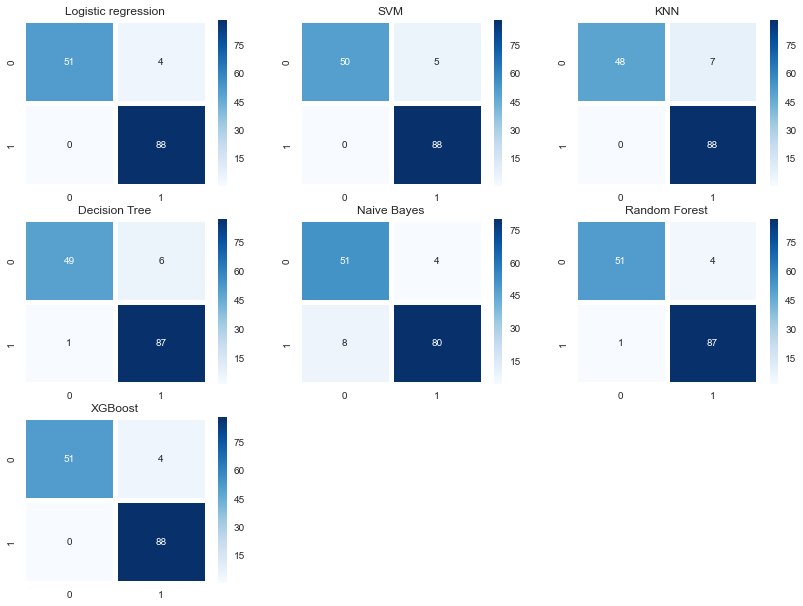

In [26]:
plt.figure(figsize=(14, 14))

plt.subplot(4, 3, 1)
draw_confusion_matrix(clf_lr, 'Logistic regression', sclr)
plt.subplot(4, 3, 2)
draw_confusion_matrix(clf_svm, 'SVM', sclr)
plt.subplot(4, 3, 3)
draw_confusion_matrix(clf_knn, 'KNN', sclr)
plt.subplot(4, 3, 4)
draw_confusion_matrix(clf_dt, 'Decision Tree')
plt.subplot(4, 3, 5)
draw_confusion_matrix(clf_nb, 'Naive Bayes')
plt.subplot(4, 3, 6)
draw_confusion_matrix(clf_rf, 'Random Forest')
plt.subplot(4, 3, 7)
draw_confusion_matrix(clf_xgb, 'XGBoost')

*TODO: Dodati zakljucak :)*

### Acknowledgements
Special thanks to...

- Creators of the article:
 
 Sharmin Ara, Department of CSE, CUET, Chittagong-4349, Bangladesh, u1604044@student.cuet.ac.bd
 
 Annesha Das, Department of CSE, CUET, Chittagong-4349, Bangladesh, annesha@cuet.ac.bd

 Ashim Dey, Department of CSE, CUET, Chittagong-4349, Bangladesh, ashim@cuet.ac.bd
 
 
- Creators of the dataset:

 Dr. William H. Wolberg, General Surgery Dept., University of
Wisconsin,  Clinical Sciences Center, Madison, WI 53792
wolberg@eagle.surgery.wisc.edu

 W. Nick Street, Computer Sciences Dept., University of
Wisconsin, 1210 West Dayton St., Madison, WI 53706
street@cs.wisc.edu  608-262-6619

 Olvi L. Mangasarian, Computer Sciences Dept., University of
Wisconsin, 1210 West Dayton St., Madison, WI 53706
olvi@cs.wisc.edu 


- Project mentor:

 Eugen Vušak, Department of Electronics, Microelectronics, Computer and Intelligent Systems, Faculty of Electrical Engineering and Computing, University of Zagreb, eugen.vusak@fer.hr